In [5]:
from numpy.linalg import eig
def pca(X, m):
    
    n, p = X.shape
    
    X = X - X.mean(axis=0)
    
    cov_matrix = np.cov(X, rowvar=False)
    
    eigvalues, eigvectors = eig(cov_matrix)
    
    eigvectors_result = np.zeros((m,p))
    
    
    for i in range(m):
        eigvectors_result[i] = eigvectors[:,i].real
    
    return eigvectors_result, eigvalues[0:m].real

### PCA on Retina1 neural factors

#### 1) ALS Method

In [3]:
from scipy.io import loadmat 
import numpy as np
retina1_als_F1 = loadmat('retina1_als_F1.mat')['F1']
retina1_als_F1

array([[-0.0118791 ,  0.00100288,  0.01876948, ..., -0.00155233,
         0.00350577,  0.17287102],
       [ 0.00697628,  0.0287227 ,  0.03266051, ...,  0.06885595,
         0.05163868,  0.16962207],
       [-0.00071939,  0.00061401, -0.02577049, ..., -0.04365661,
        -0.00836426, -0.17890328],
       ...,
       [-0.02133906,  0.00065213, -0.0011172 , ...,  0.03194431,
         0.06224828,  0.09784652],
       [ 0.01627177,  0.01503335,  0.02536371, ...,  0.09262863,
         0.06743114,  0.14257301],
       [-0.00732199, -0.0097704 , -0.01431613, ..., -0.03250857,
        -0.06827364, -0.14641671]])

In [67]:
retina1_als_F1.shape

(20, 698)

In [110]:
import matplotlib.pyplot as plt
retina1_als_vectors, retina1_als_lambdas = pca(retina1_als_F1, 10)

In [111]:
retina1_als_vectors.shape

(10, 698)

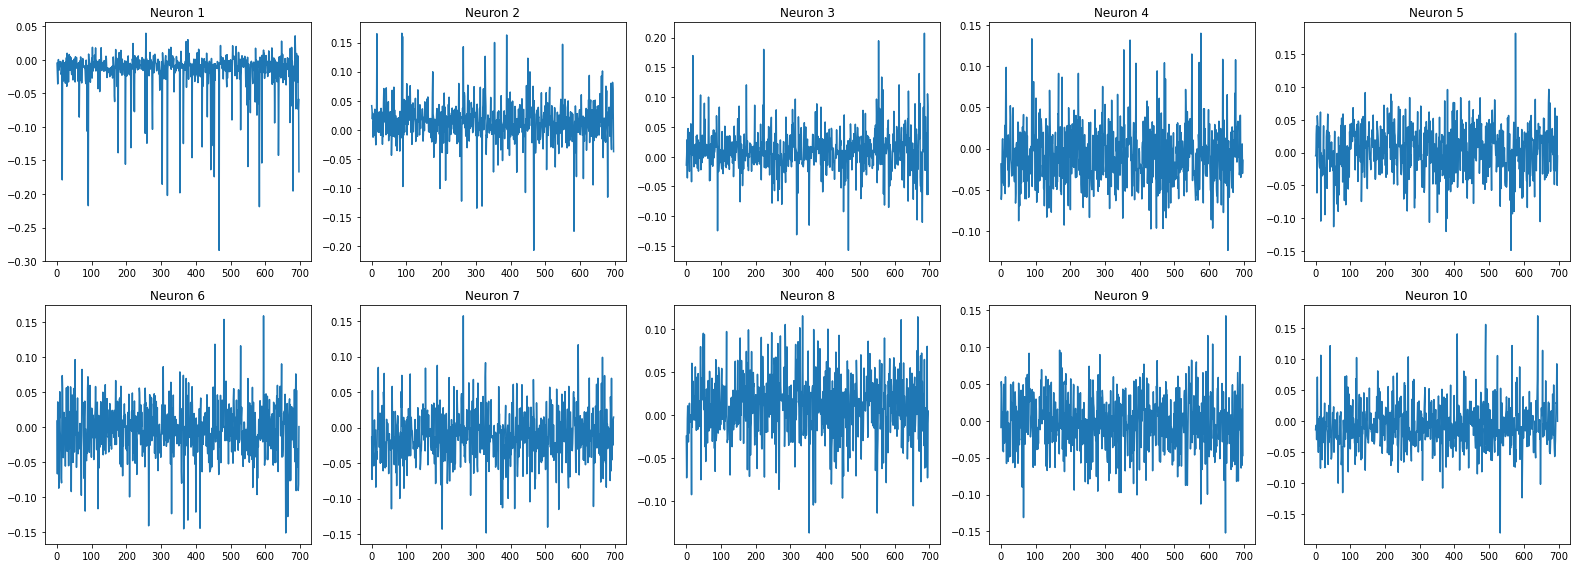

In [129]:
fig, axs = plt.subplots(nrows = 2, ncols = 5, figsize = (22,8))
for i , ax in enumerate(axs.flatten()):
    ax.plot(retina1_als_vectors[i,:])
    ax.set_title("Neuron " + str(i + 1))
fig.tight_layout()

#### 2) Non-negative Direct Optimization Method

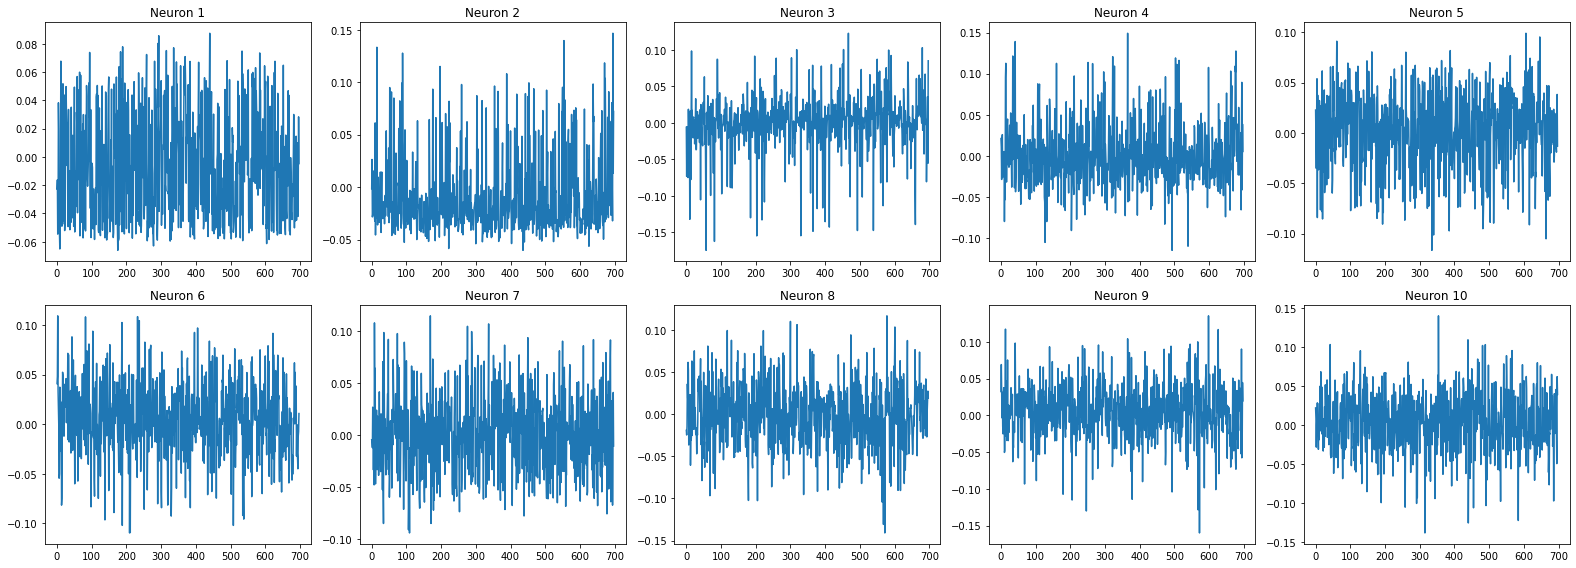

In [130]:
from scipy.io import loadmat 
import numpy as np
retina1_opt_nonneg_F1 = loadmat('retina1_opt_nonneg_F1.mat')['F1']
retina1_opt_nonneg_vectors, retina1_opt_nonneg_lambdas = pca(retina1_opt_nonneg_F1, 10)
fig, axs = plt.subplots(nrows = 2, ncols = 5, figsize = (22,8))
for i , ax in enumerate(axs.flatten()):
    ax.plot(retina1_opt_nonneg_vectors[i,:])
    ax.set_title("Neuron " + str(i + 1))
fig.tight_layout()

### PCA on Retina 2 neural factors

#### 1) ALS Method

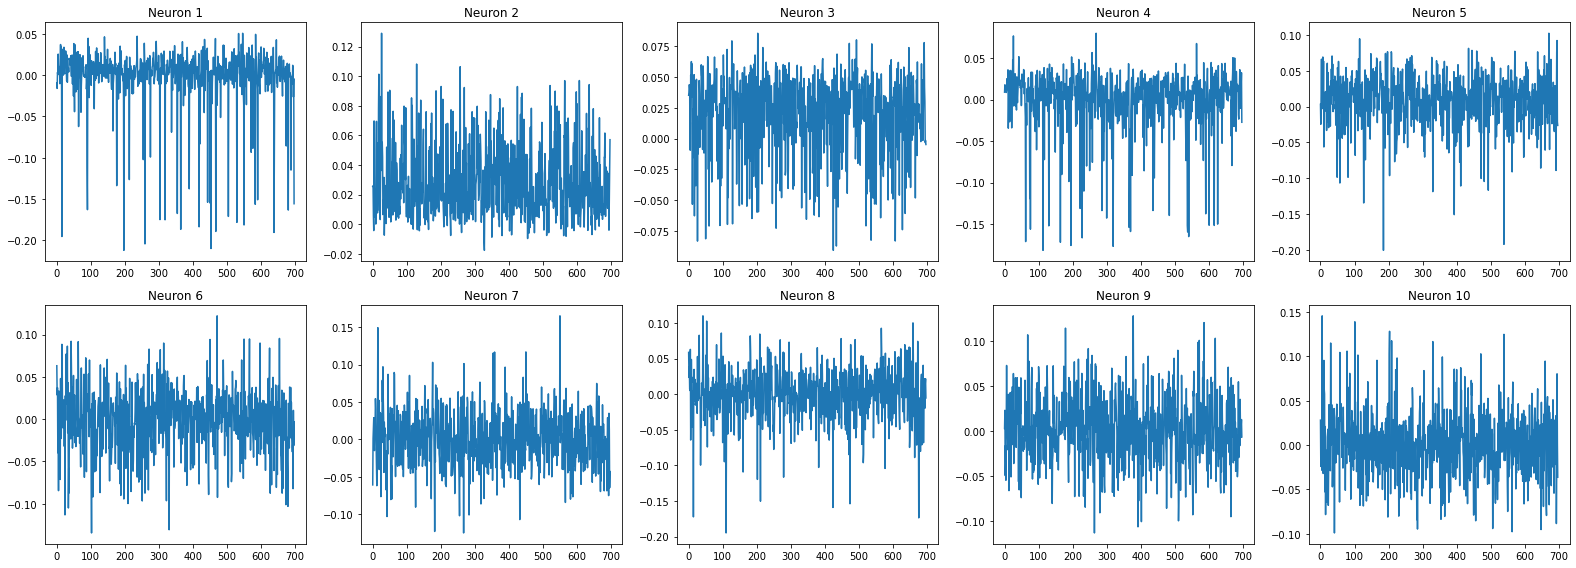

In [131]:
from scipy.io import loadmat 
import numpy as np
retina2_als_F1 = loadmat('retina2_als_F1.mat')['F1']
retina2_als_vectors, retina2_als_lambdas = pca(retina2_als_F1, 10)
fig, axs = plt.subplots(nrows = 2, ncols = 5, figsize = (22,8))
for i , ax in enumerate(axs.flatten()):
    ax.plot(retina2_als_vectors[i,:])
    ax.set_title("Neuron " + str(i + 1))
fig.tight_layout()

#### 2) Non-negative Direct Optimization Method

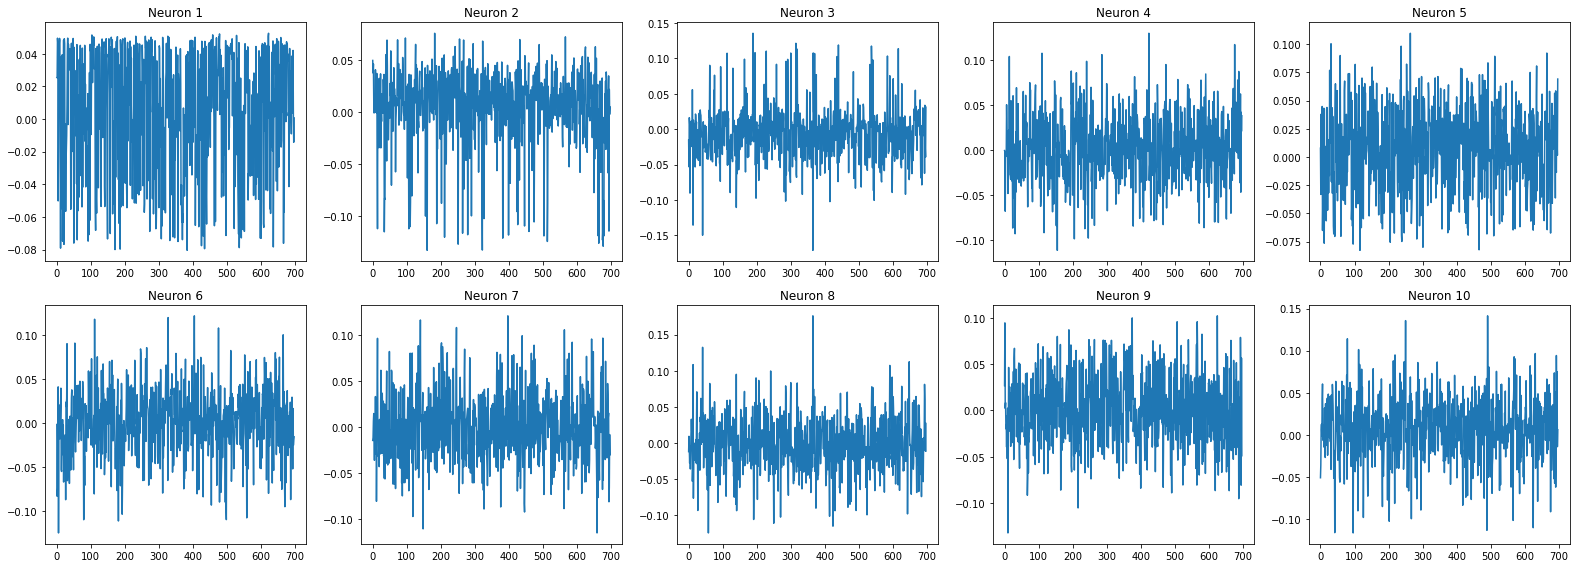

In [132]:
from scipy.io import loadmat 
import numpy as np
retina2_opt_nonneg_F1 = loadmat('retina2_opt_nonneg_F1.mat')['F1']
retina2_opt_nonneg_vectors, retina2_opt_nonneg_lambdas = pca(retina2_opt_nonneg_F1, 10)
fig, axs = plt.subplots(nrows = 2, ncols = 5, figsize = (22,8))
for i , ax in enumerate(axs.flatten()):
    ax.plot(retina2_opt_nonneg_vectors[i,:])
    ax.set_title("Neuron " + str(i + 1))
fig.tight_layout()

In [ ]:
## Check that the results of PCA implementation is correct:
from sklearn.decomposition import PCA
pca_py = PCA(2)
pca_py.fit(retina1_als_F1)
print(pca_py.components_)
print(pca_py.explained_variance_)